<a href="https://colab.research.google.com/github/brianregan111/UCDPA-BrianRegan/blob/main/ProjectF1Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
#custom function to round numbers to 2 decimal places
def round_to_two_decimal_places(number):
    return round(number, 2)

In [ ]:
#import races from CSV
races = 'https://raw.githubusercontent.com/brianregan111/UCDPA-BrianRegan/main/races.csv'
r = pd.read_csv(races , index_col=0) 
#filter dataframe to greater than 2020
r20 = r.loc[r['year'] >= 2020]
#remove unneeded columns
R2020 = r20.iloc[:, 0:4] 

In [ ]:
circuits = 'https://raw.githubusercontent.com/brianregan111/UCDPA-BrianRegan/main/circuits.csv'
cir = pd.read_csv(circuits, index_col = 0) 
cir2 = cir.drop('url', axis=1).reset_index()
display(cir2)
#create lists of continents 
Countries = ['Australia' ,'Malaysia' ,'Bahrain' ,'Spain' ,'Turkey' ,'Monaco' ,'Canada' ,'France' ,'UK' ,'Germany' ,'Hungary' ,'Belgium' ,'Italy' ,'Singapore' ,'Japan' ,'China' ,'Brazil' ,'USA' ,'UAE' ,'Argentina' ,'Portugal' ,'South Africa' ,'Mexico' ,'Korea' ,'Netherlands' ,'Sweden' ,'Austria' ,'Morocco' ,'Switzerland' ,'India' ,'Russia' ,'Azerbaijan' ,'Saudi Arabia' ,'Qatar' ]
Continent = ['Australia' ,'Asia' ,'Asia' ,'Europe' ,'Europe' ,'Europe' ,'North America' ,'Europe' ,'Europe' ,'Europe' ,'Europe' ,'Europe' ,'Europe' ,'Asia' ,'Asia' ,'Asia' ,'South America' ,'North America' ,'Asia' ,'South America' ,'Europe' ,'Africa' ,'South America' ,'Asia' ,'Europe' ,'Europe' ,'Europe' ,'Africa' ,'Europe' ,'Asia' ,'Asia' ,'Europe' ,'Asia' ,'Asia' ]
#create dictionary
my_dict = {"country":Countries , "Continent":Continent }
#build dataframe
Contmap = pd.DataFrame(my_dict)

#merge to get continent on Circuits table
cir2m = cir2.merge(Contmap, how='left')

display(cir2m)



,circuitId,circuitRef,name,location,country,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130
...,...,...,...,...,...,...,...,...
71,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108
72,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255
73,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15
74,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N


,circuitId,circuitRef,name,location,country,lat,lng,alt,Continent
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,Australia
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,Asia
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,Asia
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,Europe
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,Europe
...,...,...,...,...,...,...,...,...,...
71,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,Europe
72,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,Europe
73,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,Asia
74,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,Asia


In [ ]:
#create lists
drivers = ['Nyck de Vries NDV','Nyck de Vries NDV','Yuki Tsunoda TSU','Pierre Gasly GAS','Esteban Ocon OCO','Fernando Alonso ALO','Lance Stroll STR','Charles Leclerc LEC','Carlos Sainz SAI','Pierre Gasly GAS','Kevin Magnussen MAG','Nico Hülkenberg HUL','Lando Norris NOR','Oscar Piastri OSP','Lewis Hamilton HAM','George Russell RUS','Sergio Pérez PER','Logan Sargeant SAR','Alexander Albon ALB','Max Verstappen VER' ]

my_dictdr = {"Drivers":drivers }
#build dataframe
my_dictdr = pd.DataFrame(my_dictdr)
my_dictdr = my_dictdr.drop_duplicates(subset='Drivers')
#display(my_dictdr)

#import driver CSV
drivers = 'https://raw.githubusercontent.com/brianregan111/UCDPA-BrianRegan/main/drivers.csv'
dr = pd.read_csv(drivers , index_col=0) 
dr["Driver"]= dr["forename"] + " " + dr["surname"] + " " + dr["code"]
#display(dr)

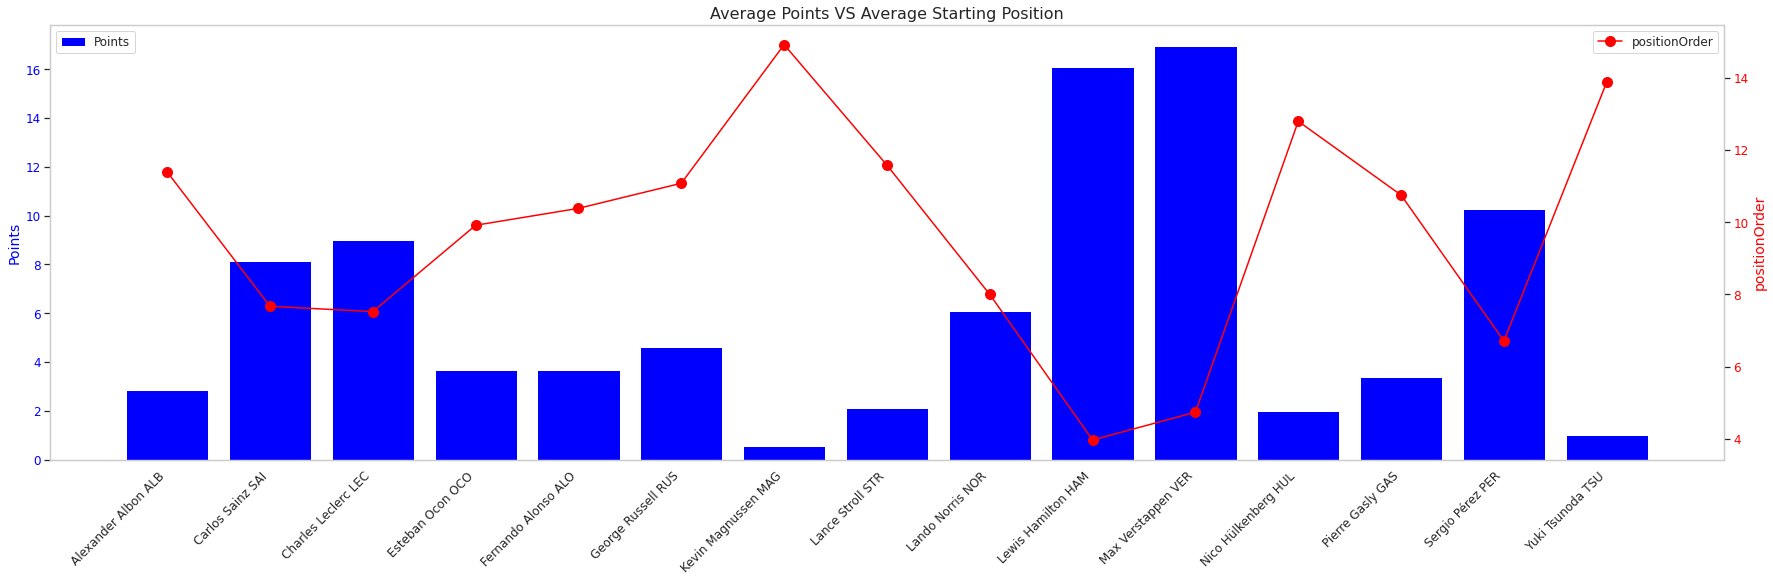

In [ ]:


results = 'https://raw.githubusercontent.com/brianregan111/UCDPA-BrianRegan/main/results.csv'
res = pd.read_csv(results , index_col=0) 

# merge results with race table to return race results for the past 3 years and race details
merged2 = pd.merge(res,R2020, left_on = 'raceId', right_on = 'raceId', how = 'inner')
#merge on drivert table with driverid to return driver details
merged3 = pd.merge(merged2,dr, left_on = 'driverId', right_on = 'driverId', how = 'inner')
#use dictionary to limit the results down to only active drivers for 2023
merged3 = pd.merge(merged3,my_dictdr, left_on = 'Driver', right_on = 'Drivers', how = 'inner')
# merge with constructer to return constructor name
merged4 = pd.merge(merged3,cir2m, left_on = 'circuitId', right_on = 'circuitId', how = 'inner')
#drop unwanted fields
merged4 =  merged4.drop(['driverId','positionText','constructorId','number_x','round','circuitId','time','milliseconds','fastestLap','rank','fastestLapTime','fastestLapSpeed','statusId','driverRef','number_y','code','forename','surname','dob'], axis=1)
# convert string to text
merged4 = merged4.astype({'points':int})
#add calculation on total positions lost or gained in a season
merged4['positions_loss_gain'] =  merged4.grid - merged4.positionOrder
#Field calculate the finishing position
merged4['Finish_Position'] = merged4.positions_loss_gain + merged4.positionOrder

# pivot by driver and return the average finishing position, the average starting position, the average points
pivitmer2= pd.pivot_table(data=merged4, index='Driver', aggfunc={ 'positionOrder': 'mean','points':'mean','Finish_Position':'mean'})
#print(pivitmer2.columns)
pivitmer2['Driver'] = pivitmer2.index
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(30,8))

# Create bar chart
ax1.bar(pivitmer2['Driver'], pivitmer2['points'], color='blue')
ax1.set_ylabel('Points', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)

# Create line chart
ax2 = ax1.twinx()
ax2.plot(pivitmer2['Driver'], pivitmer2['positionOrder'], color='red', marker='o', markersize=10)
ax2.set_ylabel('positionOrder', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)

# Set x-axis labels
ax1.set_xticks(range(len(pivitmer2['Driver'])))
ax1.set_xticklabels(pivitmer2['Driver'], rotation=45, ha='right', fontsize=12)

# Set title and legend
plt.title('Average Points VS Average Starting Position', fontsize=16)
ax1.legend(['Points'], loc='upper left', fontsize=12)
ax2.legend(['positionOrder'], loc='upper right', fontsize=12)

#dropping gridlines
ax1.grid(False)
ax2.grid(False)

# Display chart
plt.xticks(rotation=45)
plt.show()








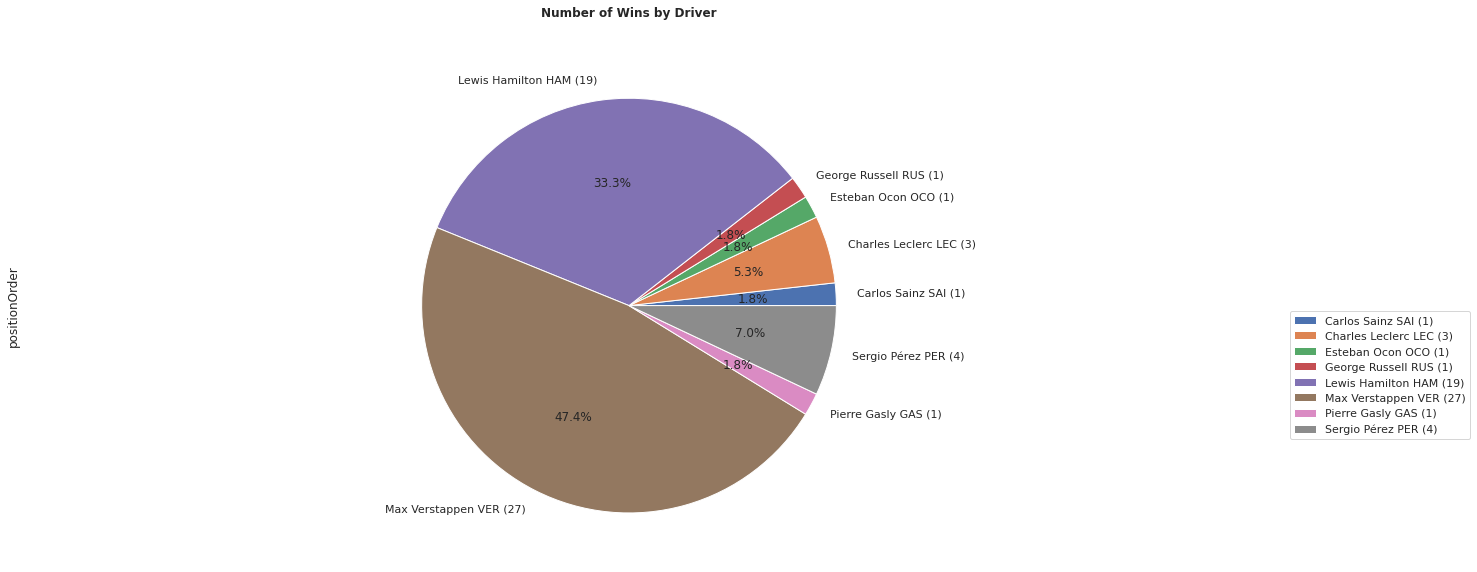

In [ ]:
#filter to just winners
winnersonly = merged4[(merged4.position == "1")]
#group total 1st time positions by driver
grouped_data = winnersonly.groupby('Driver')['positionOrder'].sum()


# Create a new DataFrame with the grouped data
df_grouped = pd.DataFrame({'Driver': grouped_data.index, 'positionOrder': grouped_data.values})

# space the chart
fig, ax = plt.subplots(figsize=(24, 8))

plt.axis('equal')

# add labels with values in line
labels = [f"{driver} ({value})" for driver, value in zip(df_grouped['Driver'], df_grouped['positionOrder'])]
#create pie chart 
df_grouped.plot(kind='pie', y='positionOrder', labels=labels, autopct='%1.1f%%', ax=ax, labeldistance=1.1)

#add title, pad it and make it bold
plt.title('Number of Wins by Driver',pad=30,fontweight='bold')  
#anchor the legend
plt.legend( bbox_to_anchor=(1.2, 0.5))
plt.subplots_adjust(left=0.05, right=0.75, top=0.95, bottom=0.05)


#show chart
plt.show()


#group by driver and year to show the wins by year, converting year to string
groupedd2 = winnersonly.groupby(["Driver", winnersonly["year"].astype("string")])["positionOrder"].sum().reset_index()
#creates scatter chart
fig = px.scatter(groupedd2, x="year", y="positionOrder", color="Driver",
                 title="Wins By Season by Driver",size = 'positionOrder')
fig.update_traces(textfont_size=20)
#turn off gridlines                  
fig.update_xaxes(showgrid=False)
#show chart
fig.show()

**Wesbscraped data**

Over: 37.88%
Under: 62.12%
2020: Lewis  Hamilton  HAM
2021: Max  Verstappen  VER
2022: Max  Verstappen  VER
Average points for 2020: 75.39
Average points for 2021: 105.05
Average points for 2022: 106.82


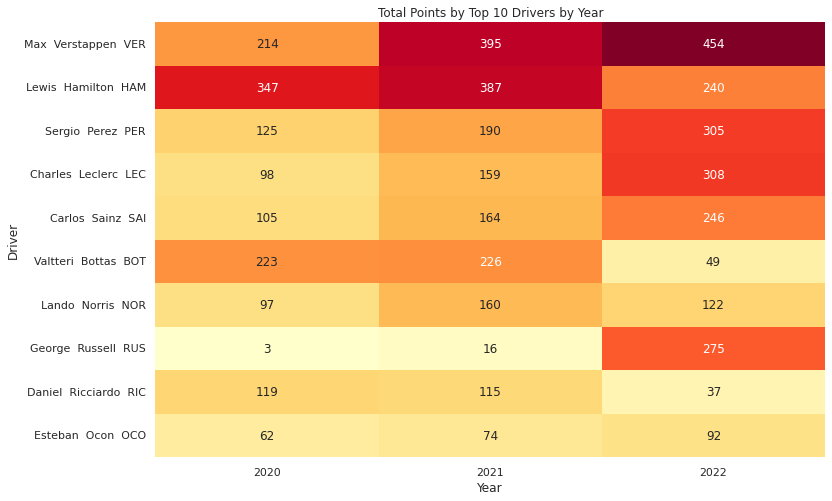

,Driver,Points,%
15,Max Verstappen VER,1063,16.90
14,Lewis Hamilton HAM,974,15.48
26,Sergio Perez PER,620,9.86
3,Charles Leclerc LEC,565,8.98
2,Carlos Sainz SAI,515,8.19
27,Valtteri Bottas BOT,498,7.92
13,Lando Norris NOR,379,6.03
8,George Russell RUS,294,4.67
4,Daniel Ricciardo RIC,271,4.31
6,Esteban Ocon OCO,228,3.62


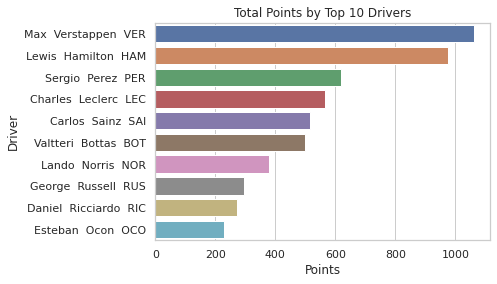

In [ ]:
# webscrape F1 standings website for 2022 standings, get data  & convert to table
url1 = requests.get('https://www.formula1.com/en/results.html/2022/drivers.html')
standings2 = pd.read_html('https://www.formula1.com/en/results.html/2022/drivers.html', index_col = 1)[0]
#drop null columns & add new field for year
Standings22 = standings2.dropna(axis=1,how='all')
Standings22.insert(0, 'Year', '2022')


# webscrape F1 standings website for 2021 standings, get data  & convert to table
url2 = requests.get('https://www.formula1.com/en/results.html/2021/drivers.html')
standings1 = pd.read_html('https://www.formula1.com/en/results.html/2021/drivers.html', index_col = 1)[0]
#drop null columns & add new field for year
Standings21 = standings1.dropna(axis=1,how='all')
Standings21.insert(0, 'Year', '2021')

# webscrape F1 standings website for 2020, standings, get data  & convert to table
url3 = requests.get('https://www.formula1.com/en/results.html/2020/drivers.html')
standings0 = pd.read_html('https://www.formula1.com/en/results.html/2020/drivers.html', index_col = 1)[0]
#drop null columns & add new field for year
Standings20 = standings0.dropna(axis=1,how='all')
Standings20.insert(0, 'Year', '2020')


# redudant as  ammend concat is more efficient: StandingsCOMB = Standings22.append([Standings22, Standings20])
#Concat 4 tables scraped
StandingsCOMB = pd.concat([Standings22,Standings21,Standings20])
#convert field's to int
StandingsCOMB = StandingsCOMB.astype({'Year':int, 'PTS': int})
# sort by year then Points
StandingsCOMB = StandingsCOMB.sort_values(by=['Year', 'PTS'], ascending=[True,False])
#rename column 
StandingsCOMB.rename(columns = { 'PTS':'Points'}, inplace = True)

#Caluclate the average points and assign to varible
avg_points = StandingsCOMB['Points'].mean()

#add conditional statement depending on the varible
StandingsCOMB['Compare to Average'] = np.where(StandingsCOMB['Points'] >= avg_points, 'over', 'under')
#count the number of rows
counts = StandingsCOMB['Compare to Average'].value_counts()
#create varibles for the over and under values 
percentage_over = counts['over'] / len(StandingsCOMB) * 100
percentage_under = counts['under'] / len(StandingsCOMB) * 100
#print varibles annd show as %
print(f"Over: {percentage_over:.2f}%")
print(f"Under: {percentage_under:.2f}%")

#pivot by driver and year, add a total columns to sort by
pvstandings = pd.pivot_table(StandingsCOMB, values='Points', index=['Driver'], columns=['Year'], aggfunc=np.sum, margins=True)
#sort by total column
clpvstandings = pvstandings.sort_values(by='All', ascending=False)
#drop All row now its been sorted
clpvstandings = clpvstandings.drop(index='All')
#drop All row column its been sorted
clpvstandings = clpvstandings.drop('All', axis=1)
#replace Nan with 0
clpvstandings.fillna(0, inplace=True)

# Find the driver with the most points in each year
#create empty list
max_drivers = []
#loop over year column
for year in clpvstandings.columns:
#use NumPy to find driver with most points
    max_index = np.argmax(clpvstandings[year])
    max_driver = clpvstandings.index[max_index]
    max_drivers.append(max_driver)
# Print the results
for i, year in enumerate(clpvstandings.columns):
    print(f"{year}: {max_drivers[i]}")
#loop over year
for year in StandingsCOMB["Year"].unique():
#get the average points for each year
    avg_points = StandingsCOMB.loc[StandingsCOMB["Year"] == year, "Points"].mean()
#print yearly averages
    print(f"Average points for {year}: {avg_points:.2f}")

#set chart size
plt.figure(figsize=(12,8))
#create heatmap using Seaborn & matplotlib
sns.heatmap(clpvstandings.head(10), cmap='YlOrRd', annot=True, fmt=".0f", cbar=False)
plt.title('Total Points by Top 10 Drivers by Year')
plt.xlabel('Year')
plt.ylabel('Driver')
#show chart
plt.show()

# Group the DataFrame by driver and reset the index
df = StandingsCOMB.groupby('Driver').agg({'Points': 'sum'}).reset_index()

 #Calculate the percentage of total points for each driver 
df['%'] = 100 * df['Points'] / df['Points'].sum()


# Sort the DataFrame by highest points
df = df.sort_values('Points', ascending=False)


#display and use custom function to reduce decimal places on %
display(round_to_two_decimal_places(df.head(10)))

# Create the horizontal bar plot using seaborn
sns.set(style="whitegrid")
fig, ax = plt.subplots()
#Only show top 10
sns.barplot(x='Points', y='Driver', data=df.head(10), ax=ax)
ax.set_xlabel('Points')
ax.set_ylabel('Driver')
#Set title
ax.set_title('Total Points by Top 10 Drivers')
plt.show()





**SQL Data**

In [ ]:
# seasons.sqlite imported from SQLlite using the seasons file, the following SQL statement was used to reduce to only required seasons: SELECT * FROM seasons Where year > "2019"
seasons = 'https://raw.githubusercontent.com/brianregan111/UCDPA-BrianRegan/main/Seasons.SQLite.csv'
seasons = pd.read_csv(seasons , index_col=0) 
#display(seasons)